In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
from bs4 import BeautifulSoup

In [2]:
#Importing the dataset
raw_data = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [3]:
#Visualizing the data format
raw_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
#Basic visualization of the dataset
import matplotlib.pyplot as plt
ylabel = raw_data["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = raw_data["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()


<Figure size 640x480 with 1 Axes>

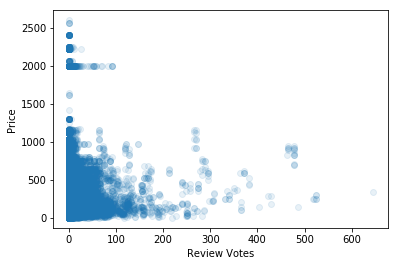

In [5]:
ylabel2 = raw_data["Price"]
plt.ylabel("Price")
xlabel2 = raw_data["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

In [6]:
df = raw_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
Product Name    413840 non-null object
Brand Name      348669 non-null object
Price           407907 non-null float64
Rating          413840 non-null int64
Reviews         413778 non-null object
Review Votes    401544 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [7]:
#Descriptive Statistics of the dataset
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [8]:
#Selecting only the columns Reviews and Ratings for Consideration of Sentiment Analysis
df=df[['Reviews','Rating']]
df.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4


In [9]:
#Data Preprocessing steps by elimination of the rows with missing values
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413778 entries, 0 to 413839
Data columns (total 2 columns):
Reviews    413778 non-null object
Rating     413778 non-null int64
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [10]:
#Elimination of rows with neutral sentiment since 3 is neither positive nor negative on a scale of 1 to 5.
df=df[df['Rating']!=3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382015 entries, 0 to 413839
Data columns (total 2 columns):
Reviews    382015 non-null object
Rating     382015 non-null int64
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [11]:
# Assignning Positive Rating > 3 as 1 and Negative Rating which is less than 3 as 0
df['sentiment']=np.where(df['Rating'] > 3, 1, 0)
df.head()

,Reviews,Rating,sentiment
0,I feel so LUCKY to have found this used (phone...,5,1
1,"nice phone, nice up grade from my pantach revu...",4,1
2,Very pleased,5,1
3,It works good but it goes slow sometimes but i...,4,1
4,Great phone to replace my lost phone. The only...,4,1


In [12]:
df.tail()

,Reviews,Rating,sentiment
413832,good rugged phone that has a long-lasting batt...,4,1
413834,used hard,1,0
413835,another great deal great price,5,1
413837,Passes every drop test onto porcelain tile!,5,1
413839,Only downside is that apparently Verizon no lo...,4,1


In [13]:
#Function for data cleaning
Cstopwords=set(stopwords.words('english')+list(punctuation))
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def clean_review(review_column):
    review_corpus=[]    
    review=review_column
    #review=BeautifulSoup(review,'lxml').text
    review=re.sub('[^a-zA-Z]',' ',review)
    review=str(review).lower()
    review=word_tokenize(review)
    #review=[stemmer.stem(w) for w in review if w not in Cstopwords]
    review=[lemma.lemmatize(w) for w in review ]
    review=' '.join(review)
    review_corpus.append(review)
    return review

In [14]:
review_column=df['Reviews']
review_corpus=review_column.apply(clean_review)

In [15]:
review_column

0         I feel so LUCKY to have found this used (phone...
1         nice phone, nice up grade from my pantach revu...
2                                              Very pleased
3         It works good but it goes slow sometimes but i...
4         Great phone to replace my lost phone. The only...
5         I already had a phone with problems... I know ...
6         The charging port was loose. I got that solder...
7         Phone looks good but wouldn't stay charged, ha...
8         I originally was using the Samsung S2 Galaxy f...
11        This is a great product it came after two days...
12        These guys are the best! I had a little situat...
13        I'm really disappointed about my phone and ser...
14        Ordered this phone as a replacement for the sa...
15        Had this phone before and loved it but was not...
16        I was able to get the phone I previously owned...
17        I brought this phone as a replacement for my d...
18        I love the phone. It does ever

In [16]:
df['clean_reviews'] = review_corpus

In [17]:
df['clean_reviews'].head(10)

0     i feel so lucky to have found this used phone ...
1     nice phone nice up grade from my pantach revue...
2                                          very pleased
3     it work good but it go slow sometimes but it a...
4     great phone to replace my lost phone the only ...
5     i already had a phone with problem i know it s...
6     the charging port wa loose i got that soldered...
7     phone look good but wouldn t stay charged had ...
8     i originally wa using the samsung s galaxy for...
11    this is a great product it came after two day ...
Name: clean_reviews, dtype: object

In [18]:
df['clean_reviews']=review_corpus
df.tail(20)

,Reviews,Rating,sentiment,clean_reviews
413815,"This phone is simple, very good , and it works...",5,1,this phone is simple very good and it work exc...
413816,Good sturdy phone for a pre-teen to have avail...,4,1,good sturdy phone for a pre teen to have avail...
413817,This is the second junk Convoy I have owned. T...,1,0,this is the second junk convoy i have owned th...
413819,I BOUGHT THIS PHONE FOR MY HUSBAND AND HE LOVE...,5,1,i bought this phone for my husband and he love...
413820,They said phone was normal wear but it was a l...,1,0,they said phone wa normal wear but it wa a lie...
413821,"You could shoot this out of a potato gun, and ...",5,1,you could shoot this out of a potato gun and p...
413822,Bought this for my mother and she loves it. Gr...,5,1,bought this for my mother and she love it grea...
413823,"Excellent phone, as advertised. Love the push-...",5,1,excellent phone a advertised love the push to ...
413824,works great and picks up signal in place my ot...,4,1,work great and pick up signal in place my othe...
413825,"Great phone. Large keys, best flip phone I hav...",5,1,great phone large key best flip phone i have o...


In [20]:
#Feature Engineering CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv=CountVectorizer(max_features=20000,min_df=5,ngram_range=(1,2))

In [22]:
X1=cv.fit_transform(df['clean_reviews'])
X1.shape

(382015, 20000)

In [23]:
#Feature Engineering using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf=TfidfVectorizer(min_df=5, max_df=0.95, max_features = 20000, ngram_range = ( 1, 2 ),
                              sublinear_tf = True)

In [25]:
tfidf=tfidf.fit(df['clean_reviews'])

In [26]:
X2=tfidf.transform(df['clean_reviews'])
X2.shape

(382015, 20000)

In [27]:
y=df['sentiment'].values
y.shape

(382015,)

In [28]:
#Using the TF-IDF features on machine learning algorithms
X = X2
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(305612, 20000) (305612,)
(76403, 20000) (76403,)


In [29]:
#Implementing Logistic Based Regression model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression as lr
model_lr=lr(random_state=0)
model_lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)
print('Accuracy for Logistic Regression :',accuracy_score(y_test,y_pred_lr))
print('Confusion matrix for Logistic Regression:\n',confusion_matrix(y_test,y_pred_lr))
print('F1 score for Logistic Regression :',f1_score(y_test,y_pred_lr))
print('Precision score for Logistic Regression :',precision_score(y_test,y_pred_lr))
print('recall score for Logistic Regression :',recall_score(y_test,y_pred_lr))
print('AUC: ', roc_auc_score(y_test, y_pred_lr))

C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for Logistic Regression : 0.9623444105597948
Confusion matrix for Logistic Regression:
 [[17833  1632]
 [ 1245 55693]]
F1 score for Logistic Regression : 0.9748212457225874
Precision score for Logistic Regression : 0.9715307457479285
recall score for Logistic Regression : 0.978134110787172
AUC:  0.9471456580136735


In [30]:
#Top 10 features obtained using CountVectorizer 
feature_names = np.array(cv.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model_lr.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'worst' 'disappointed' 'not happy' 'poor' 'terrible' 'doesn'
 'horrible' 'useless' 'return']

Largest Coefs: 
['great' 'love' 'excellent' 'perfect' 'no problem' 'amazing' 'awesome'
 'best' 'love this' 'not bad']


In [31]:
#Implementing Multinomial Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB()
model_nb.fit(X_train,y_train)
y_pred_nb=model_nb.predict(X_test)
y_te_nb= model_nb.predict(X_test[6]) 
print('accuracy for Naive Bayes Classifier :',accuracy_score(y_test,y_pred_nb))
print('confusion matrix for Naive Bayes Classifier:\n',confusion_matrix(y_test,y_pred_nb))
print('F1 score for Logistic Regression :',f1_score(y_test,y_pred_nb))
print('Precision score for Logistic Regression :',precision_score(y_test,y_pred_nb))
print('recall score for Logistic Regression :',recall_score(y_test,y_pred_nb))
print('AUC: ', roc_auc_score(y_test, y_pred_nb))

accuracy for Naive Bayes Classifier : 0.9368480295276364
confusion matrix for Naive Bayes Classifier:
 [[16687  2778]
 [ 2047 54891]]
F1 score for Logistic Regression : 0.9578996047361854
Precision score for Logistic Regression : 0.9518285387296468
recall score for Logistic Regression : 0.9640486142822017
AUC:  0.9106654579245582


In [32]:
# get the feature names as numpy array
feature_names = np.array(cv.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model_nb.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst purchase' 'never recommend' 'total waste' 'nothing work' 'is scam'
 'royalty' 'reported stolen' 'zero star' 'very dissapointed'
 'started freezing']

Largest Coefs: 
['good' 'great' 'phone' 'it' 'excellent' 'the' 'and' 'love' 'very' 'is']


In [33]:
#Implementing the Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred_rf=model_rf.predict(X_test)
print('accuracy for Random Forest Classifier :',accuracy_score(y_test,y_pred_rf))
print('confusion matrix for Random Forest Classifier:\n',confusion_matrix(y_test,y_pred_rf))
print('F1 score for Logistic Regression :',f1_score(y_test,y_pred_rf))
print('Precision score for Logistic Regression :',precision_score(y_test,y_pred_rf))
print('recall score for Logistic Regression :',recall_score(y_test,y_pred_rf))
print('AUC: ', roc_auc_score(y_test, y_pred_rf))

C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy for Random Forest Classifier : 0.9702891247725874
confusion matrix for Random Forest Classifier:
 [[18247  1218]
 [ 1052 55886]]
F1 score for Logistic Regression : 0.9800950526998825
Precision score for Logistic Regression : 0.9786704959372373
recall score for Logistic Regression : 0.9815237626892409
AUC:  0.9594749560941709


In [34]:
feature_names = np.array(cv.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model_rf.feature_importances_.argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['zune' 'camera front' 'point it' 'camera have' 'camera if' 'pocket of'
 'plus is' 'plus gb' 'plus for' 'plugging']

Largest Coefs: 
['not' 'great' 'love' 'the phone' 'good' 'return' 'it' 'bad' 'stopped'
 'after']


In [19]:
#Positive Reviews
df[df['sentiment']==1]['clean_reviews']

0         i feel so lucky to have found this used phone ...
1         nice phone nice up grade from my pantach revue...
2                                              very pleased
3         it work good but it go slow sometimes but it a...
4         great phone to replace my lost phone the only ...
8         i originally wa using the samsung s galaxy for...
11        this is a great product it came after two day ...
12        these guy are the best i had a little situatio...
14        ordered this phone a a replacement for the sam...
16        i wa able to get the phone i previously owned ...
17        i brought this phone a a replacement for my da...
18        i love the phone it doe everything i need and ...
20        the battery wa old had been over used because ...
21        pro beautiful screen capable of running chrome...
23        phone good just a little slow phone old but it...
24        phone s speaker little low overall very happy ...
25        the phone wa great and in good

In [27]:
text = df['clean_reviews'].to_string()

In [28]:
type(text)

str

In [23]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [32]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import urllib
import requests
import matplotlib.pyplot as plt
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/e/4/2/a/1194984465469237978slim_cell_phone_israel_c_01.svg.med.png', stream=True).raw))

In [39]:
#WordCloud Function for Positive and Negative Reviews 
def generate_wordcloud(text, mask):
    word_cloud = WordCloud(width = 400, height = 800, background_color='black', stopwords=STOPWORDS, mask=mask).generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

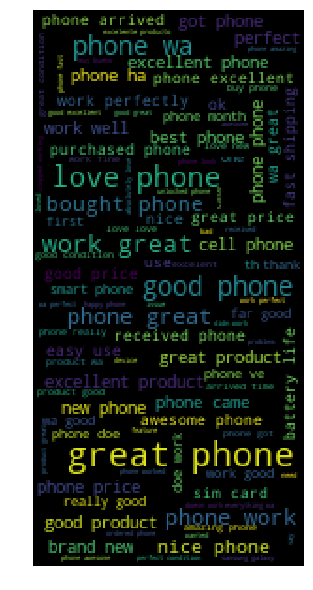

In [40]:
generate_wordcloud(text, mask)

In [47]:
#Negative Reviews
negative = df[df['sentiment']==0]['clean_reviews']

In [49]:
negcontent = negative.to_string()

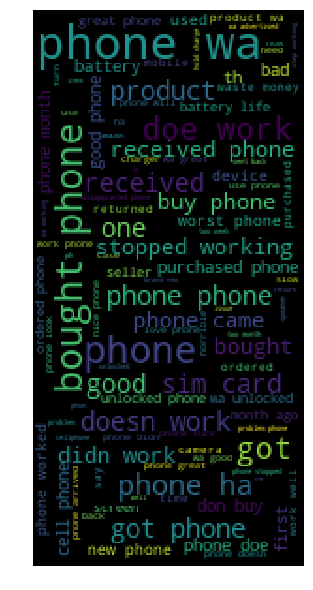

In [50]:
generate_wordcloud(negcontent, mask)